<a href="https://colab.research.google.com/github/markt22/IniFile/blob/master/MDT_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph MDT data
Load libaries and selected data into the dataframe

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/mdt.2024-10-16-13.50.10.csv", usecols=[1,26,30,33])
#convert timestamp
df['Timestamp'] = pd.to_datetime(df['time'])
df = df[df['name.1'].isna() == False]
df.head()

,time,name.1,samples,target,Timestamp
0,1729104028272124879,close,6.906628e+09,exa1-MDT0004,2024-10-16 18:40:28.272124879
1,1729104028272124879,crossdir_rename,3.058175e+06,exa1-MDT0004,2024-10-16 18:40:28.272124879
2,1729104028272124879,NaN,NaN,exa1-MDT0004,2024-10-16 18:40:28.272124879
3,1729104028272124879,getattr,2.994610e+09,exa1-MDT0004,2024-10-16 18:40:28.272124879
4,1729104028272124879,getxattr,3.526555e+09,exa1-MDT0004,2024-10-16 18:40:28.272124879


Filter out the rows are not interested in right now
Only looking at mdt operations

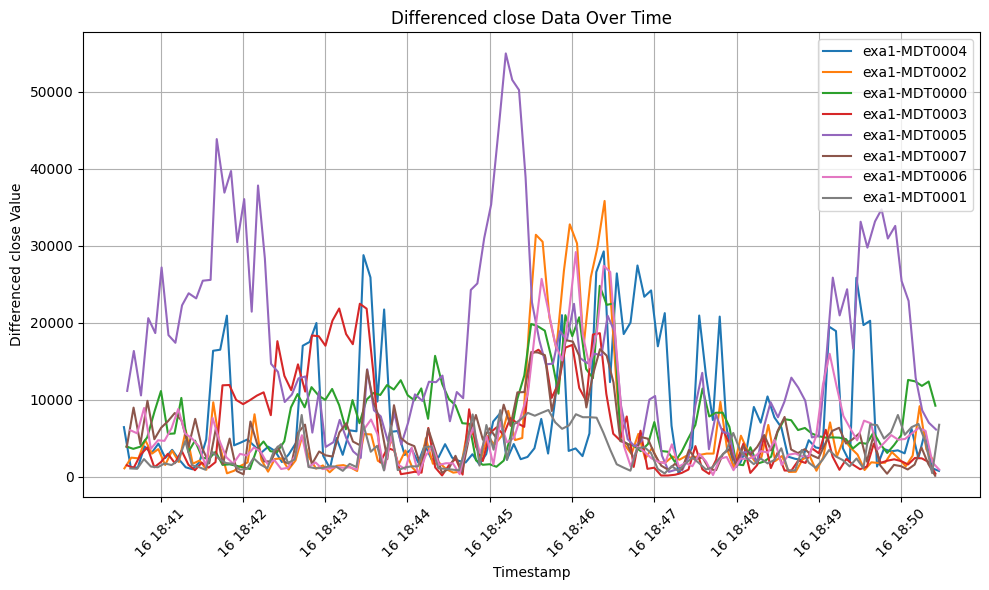

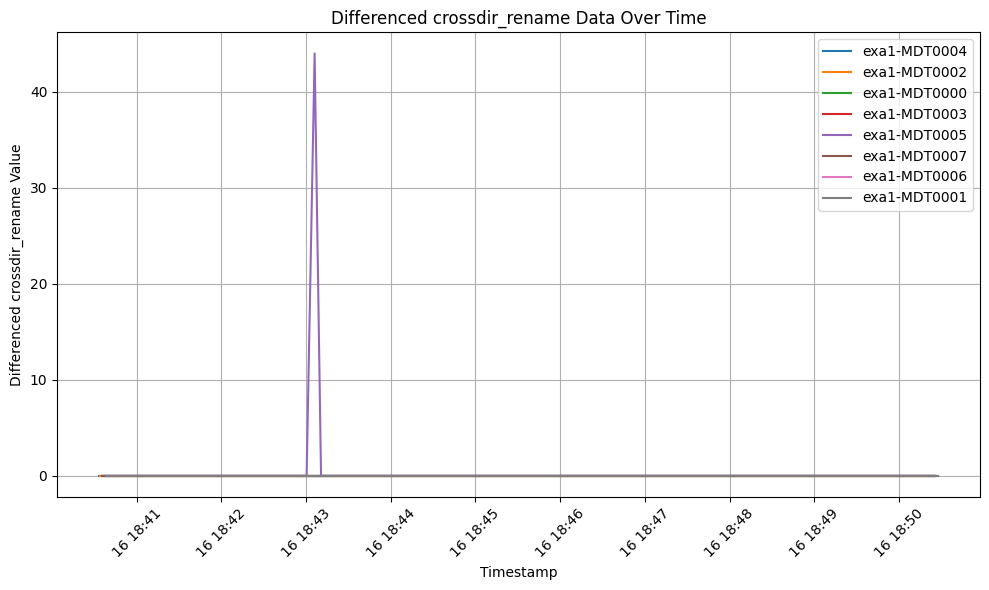

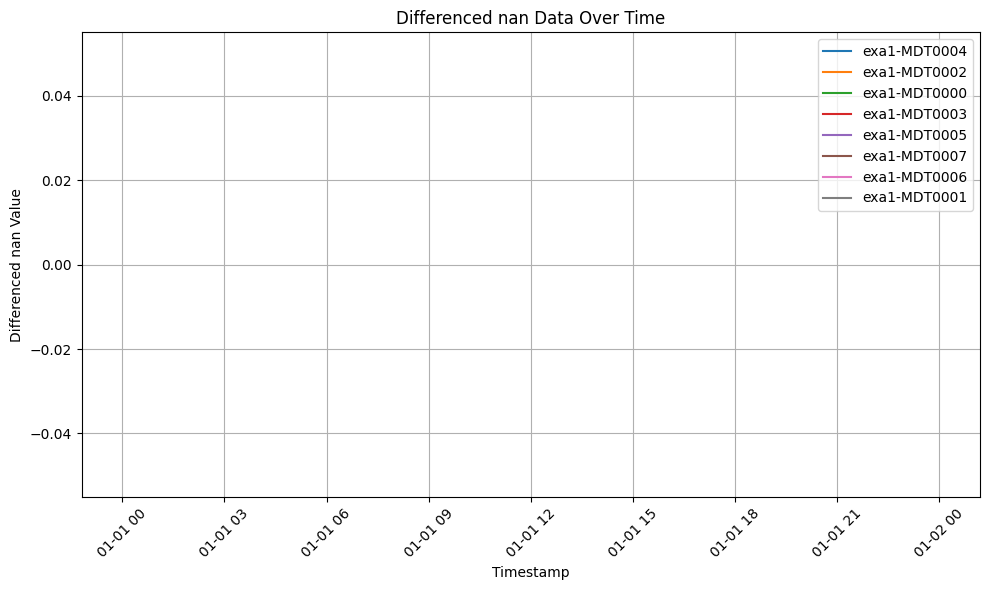

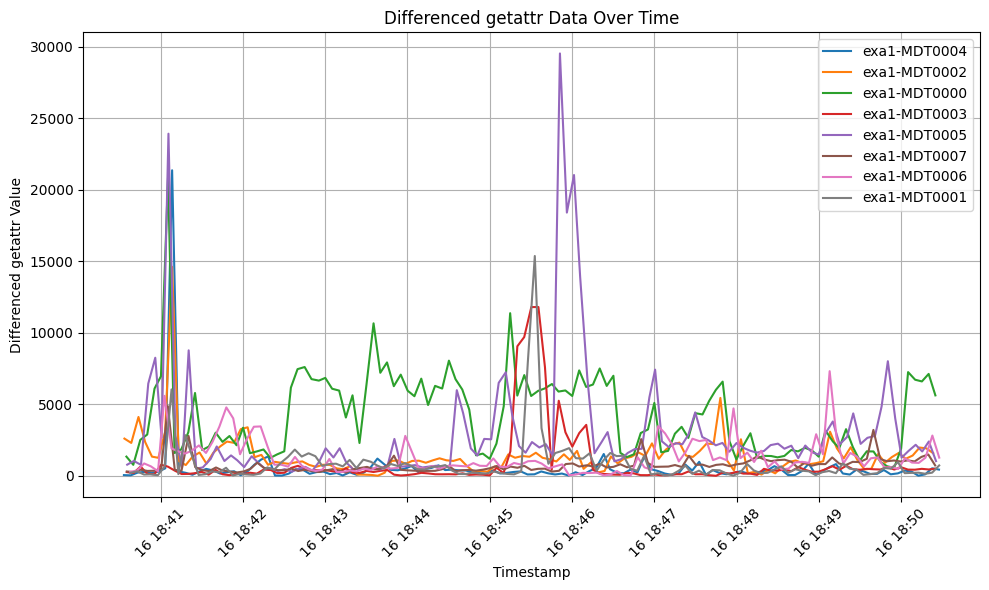

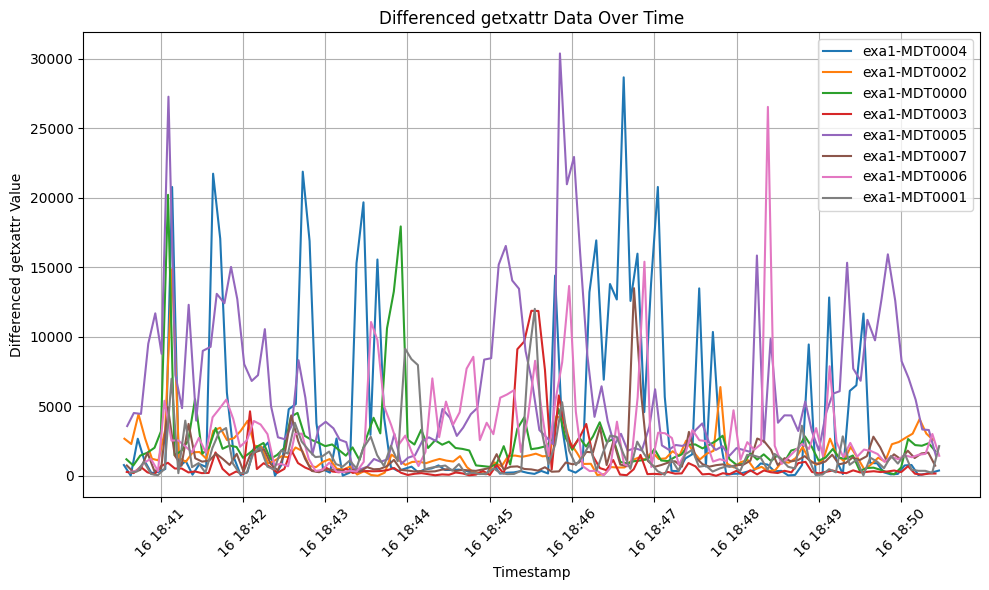

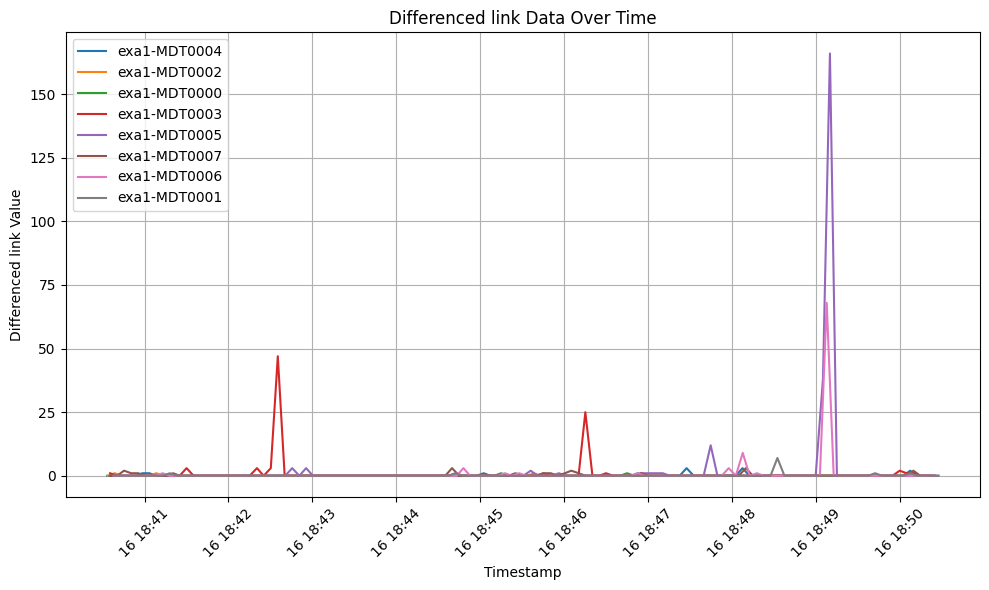

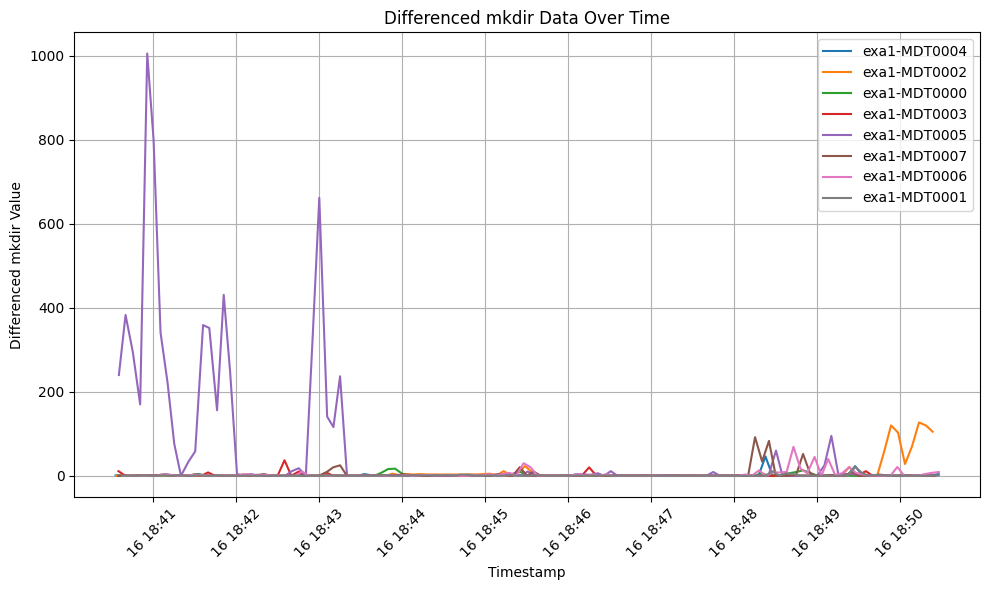

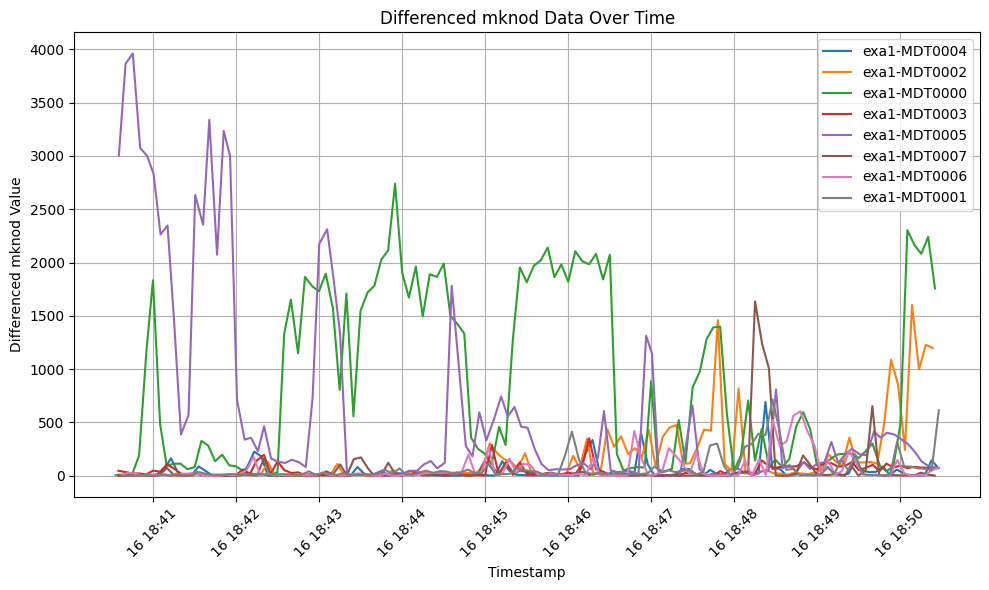

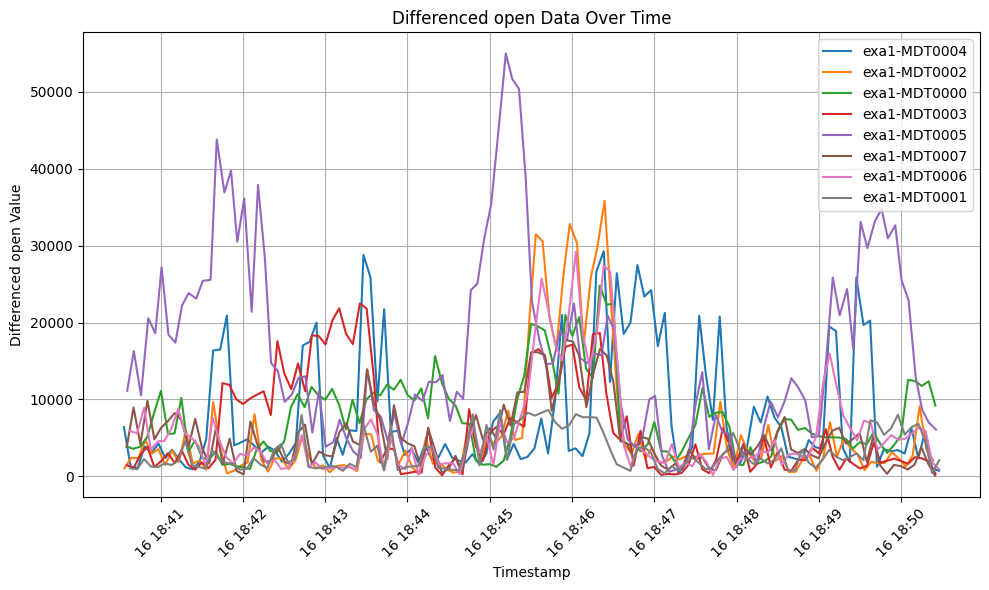

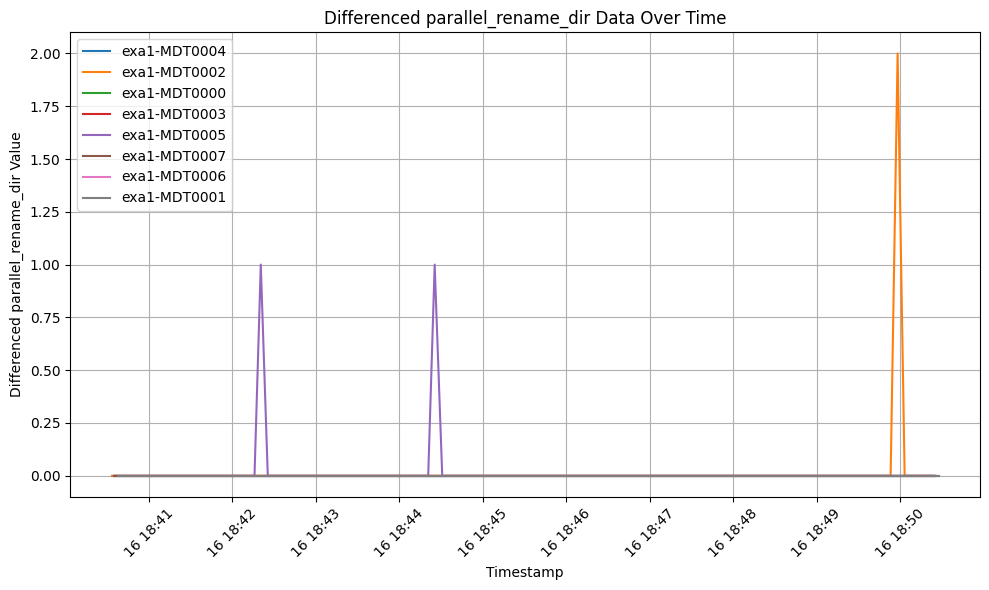

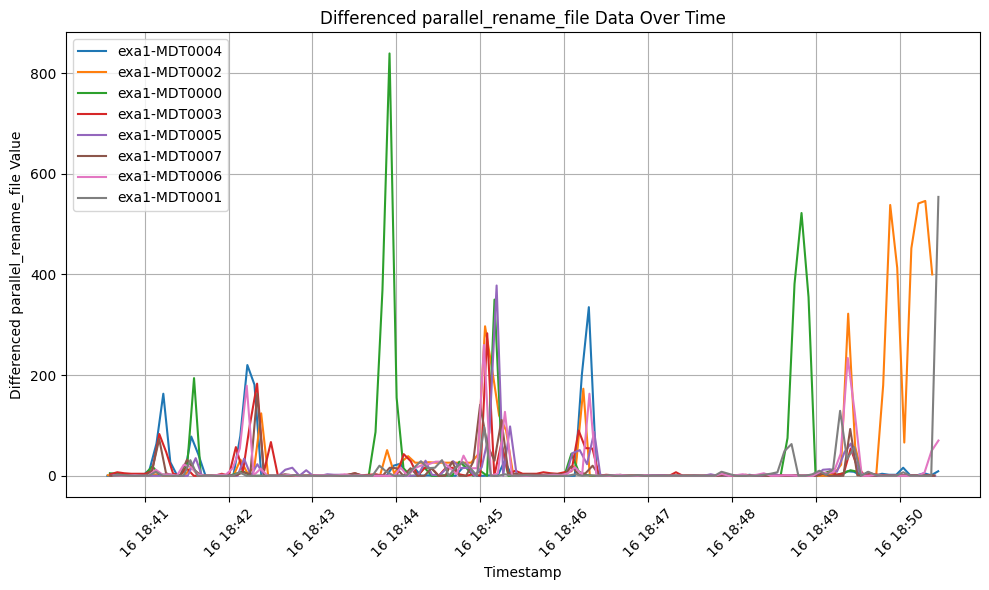

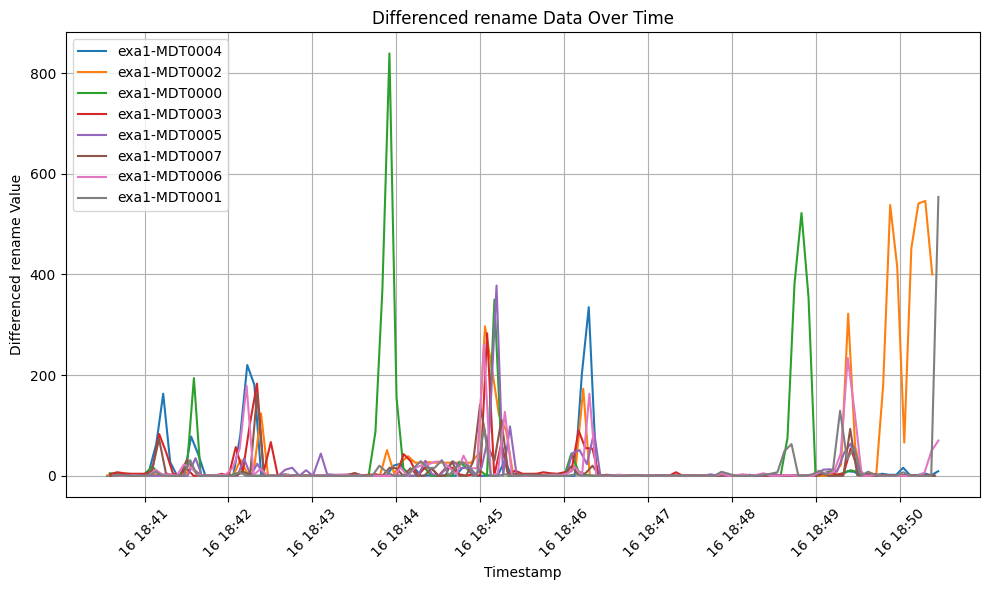

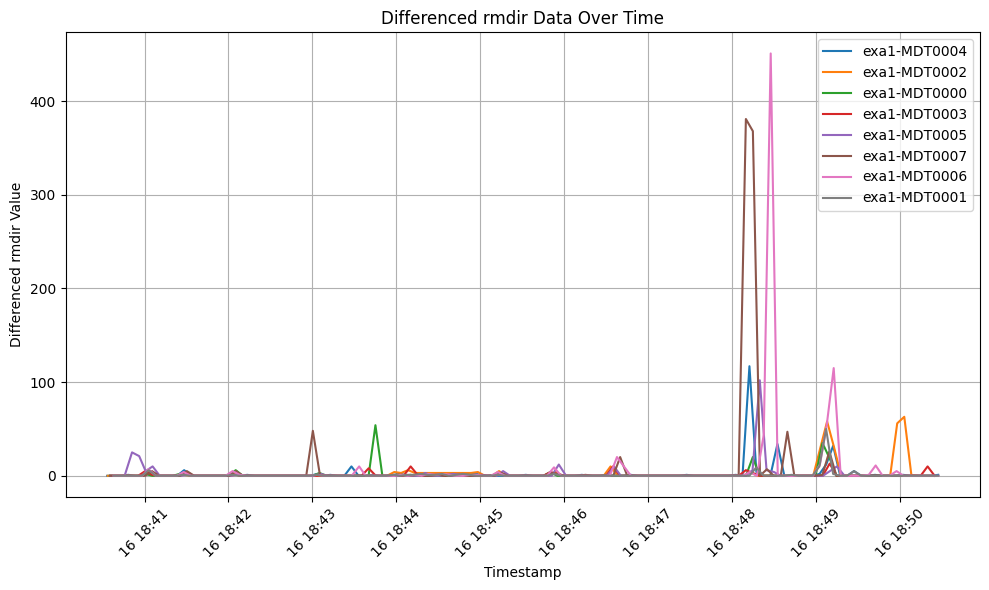

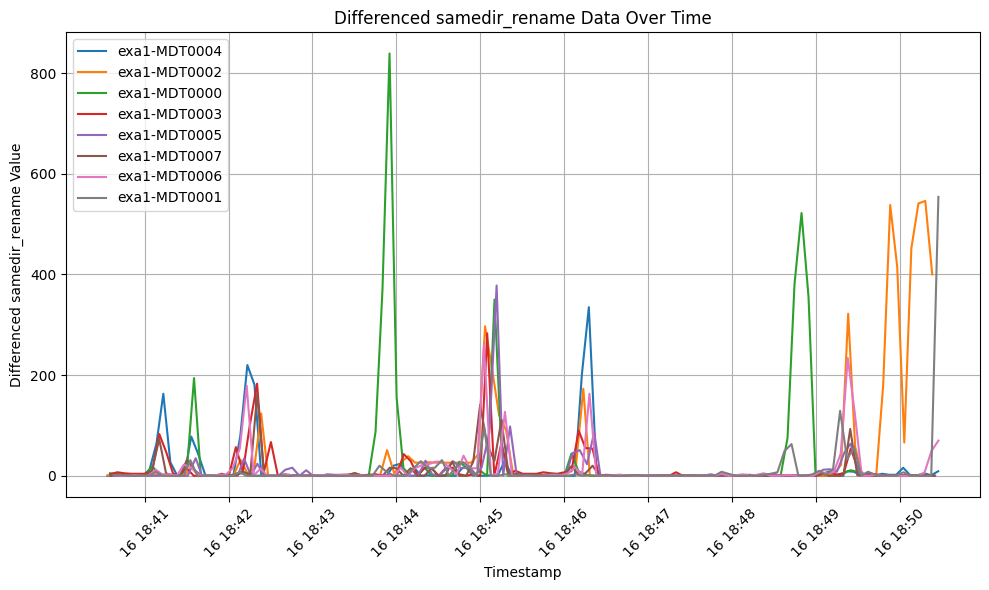

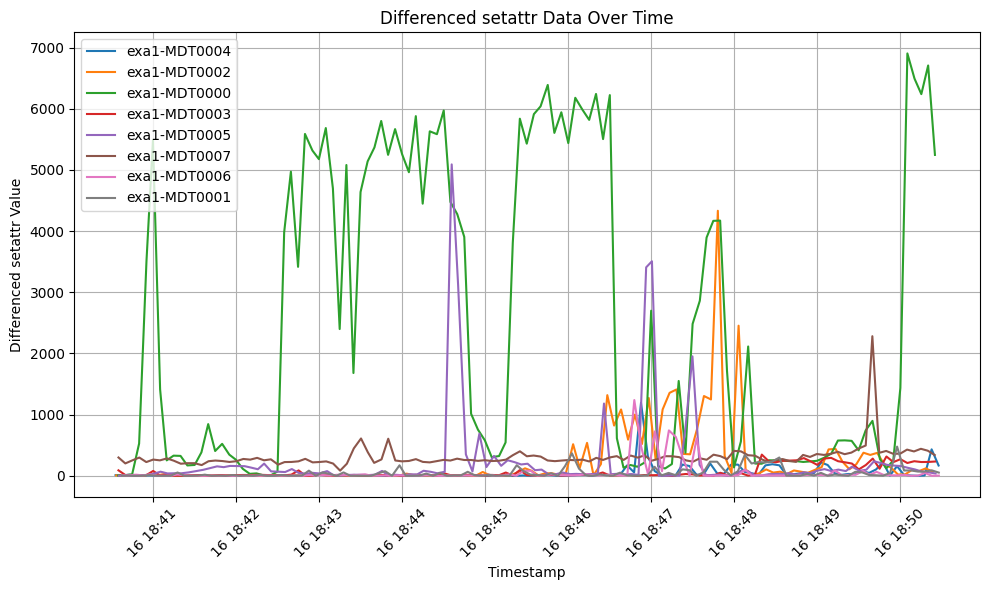

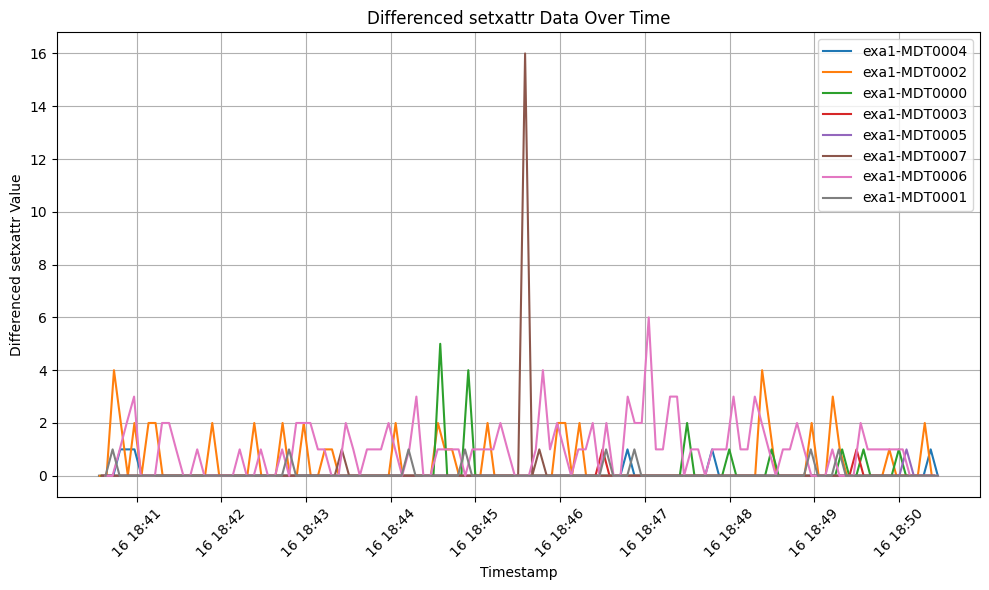

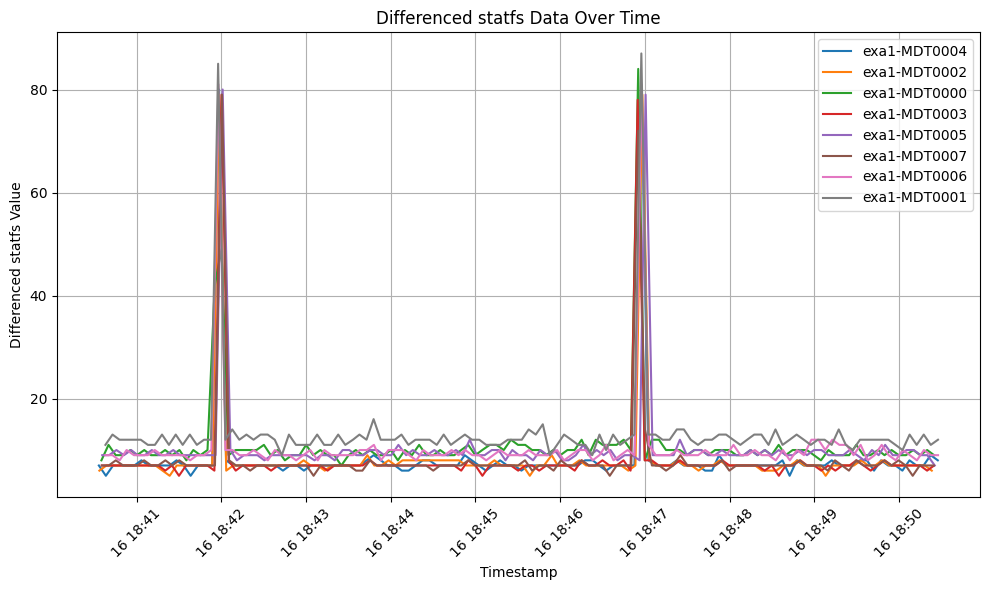

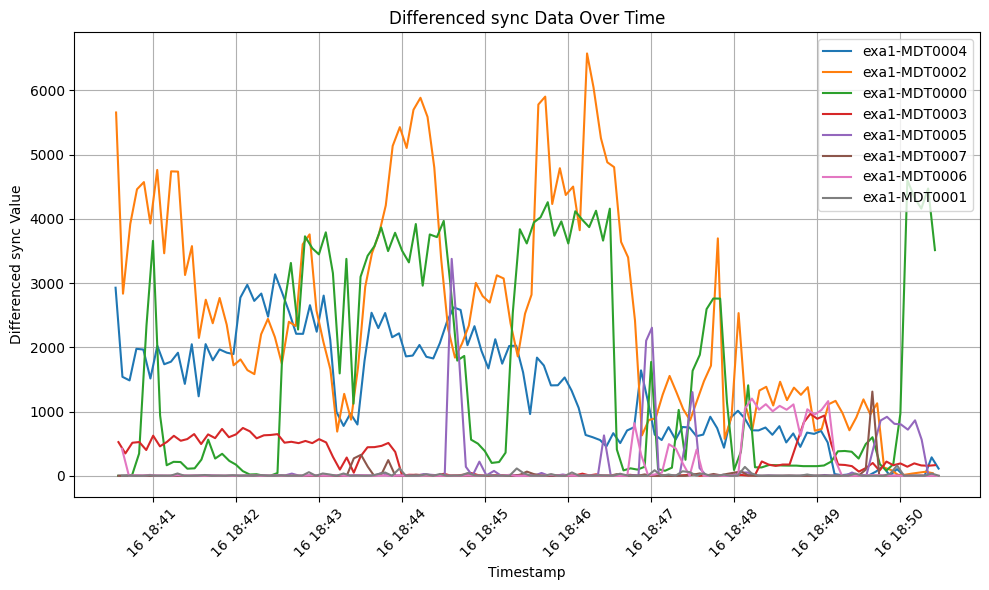

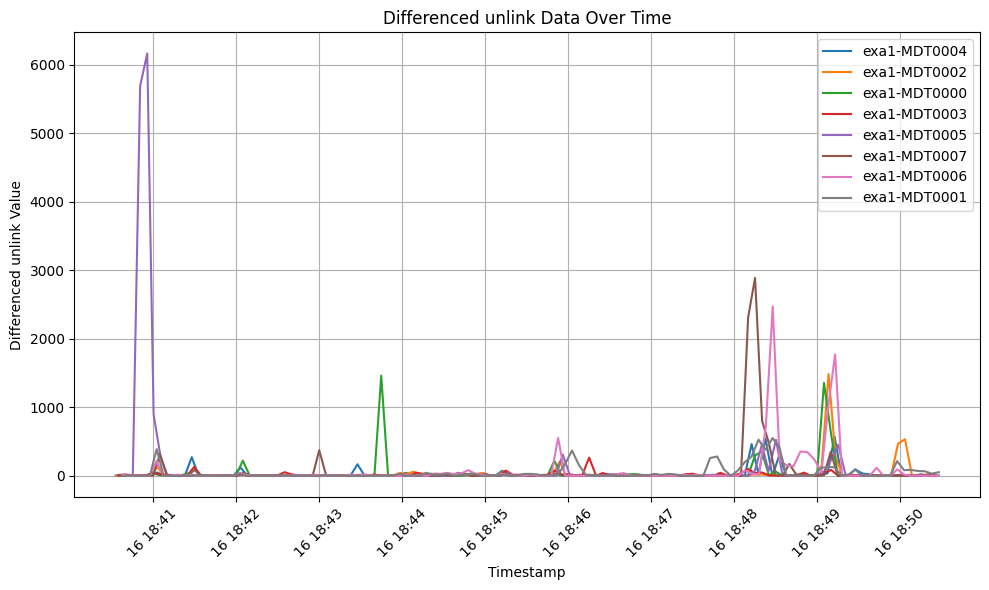

In [12]:
#difference the samples by target by operation
df['sample_diff'] = df[['time','name.1','samples','target']].groupby(['target','name.1'])['samples'].diff()

for operation in df['name.1'].unique():
  plt.figure(figsize=(10, 6))
  for target in df['target'].unique():
    data = df[(df['target'] == target) & (df['name.1'] == operation)]
    plt.plot(data['Timestamp'], data['sample_diff'], label=target)

  # Customize the plot
  plt.xlabel('Timestamp')
  plt.ylabel(f'Differenced {operation} Value')
  plt.title(f'Differenced {operation} Data Over Time')
  plt.legend()
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()